## **Gale-Shapley and Irving Algorithms**

### * Kevin Leonardo Alvarez Mora
### * **Group:** 2

### **1.** Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

### **From Towards Data Science**


### For $n=4$

In [1]:
import random as rd
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy

# n = 4 Participants List
man_list = ['M1', 'M2', 'M3', 'M4']
women_list = ['F1', 'F2', 'F3', 'F4']

In [3]:
#We create the base, and a temporal copy to be modified
base = [1,2,3,4]
copy = base[:]
#rd.sample(copy,len(copy))

In [4]:
women_df = pd.DataFrame({'F1':[4,2,1,3],
                         'F2':[3,2,1,4],
                         'F3':[1,3,4,2],
                         'F4':[4,3,1,2]})
women_df.index = man_list
women_df

,F1,F2,F3,F4
M1,4,3,1,4
M2,2,2,3,3
M3,1,1,4,1
M4,3,4,2,2


In [5]:


man_df = pd.DataFrame({'F1':[2,4,3,1],
                       'F2':[1,4,2,3],
                       'F3':[3,4,1,2],
                       'F4':[3,1,2,4]})
man_df.index = man_list
man_df



,F1,F2,F3,F4
M1,2,1,3,3
M2,4,4,4,1
M3,3,2,1,2
M4,1,3,2,4


In [8]:
import time
from timeit import default_timer as timer
start = timer()


# dict to control which women each man can make proposals
women_available = {man:women_list for man in man_list}
# waiting list of men that were able to create pair on each iteration
waiting_list = []
# dict to store created pairs
proposals = {}
# variable to count number of iterations
count = 0

# while not all men have pairs
while len(waiting_list)<len(man_list):
    # man makes proposals
    for man in man_list:
        if man not in waiting_list:
            # each man make proposal to the top women from it's list
            women = women_available[man]
            best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
            proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                 women_df.loc[man][best_choice])
    # if women have more than one proposals 
    # she will choose the best option
    overlays = Counter([key[1] for key in proposals.keys()])
    # cycle to choose the best options
    for women in overlays.keys():
        if overlays[women]>1:
            # pairs to drop from proposals
            pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                    if women in pair}.items(), 
                   key=lambda x: x[1][1]
                  )[1:]
            # if man was rejected by woman
            # there is no pint for him to make proposal 
            # second time to the same woman
            for p_to_drop in pairs_to_drop:
                del proposals[p_to_drop[0]]
                _women = copy(women_available[p_to_drop[0][0]])
                _women.remove(p_to_drop[0][1])
                women_available[p_to_drop[0][0]] = _women
    # man who successfully created pairs must be added to the waiting list 
    waiting_list = [man[0] for man in proposals.keys()]
    # update counter
    count+=1

    end = timer()
print(end - start)

0.003944627999999284


In [9]:
count

1

In [10]:
proposals

{('M1', 'F2'): (1, 3),
 ('M2', 'F4'): (1, 3),
 ('M3', 'F3'): (1, 4),
 ('M4', 'F1'): (1, 3)}

### For $n=40$

In [47]:
from timeit import default_timer as timer
start = timer()
N = 40
def wPrefersM1OverM(prefer, w, m, m1):   
    for i in range(N):
        if (prefer[w][i] == m1): 
            return True
        if (prefer[w][i] == m): 
            return False

def stableMarriage(prefer):   
    wPartner = [-1 for i in range(N)]   
    mFree = [False for i in range(N)]   
    freeCount = N
     
    while (freeCount > 0):
        
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1  
            else:              
                m1 = wPartner[w - N] 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
    
def stableMarriage2(prefer):   
    wPartner = [-1 for i in range(N)]   
    mFree = [False for i in range(N)]   
    freeCount = N     
    while (freeCount > 0): 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1  
            else:              
                m1 = wPartner[w - N] 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
    print("Woman ", " Man") 
    for i in range(N): 
        print(i + N, "\t", wPartner[i])
end = timer()
print(end - start)

0.0005050849999861384


In [65]:
from timeit import default_timer as timer2
start = timer2()
from random import sample
from time import time
N=40
man = range(0,40)
woman=range(40,80)
timer=[0,0,0,0,0,0]
prefer=[0,0,0,0,0,0]
for i in range(1000):
  preferBoys = [sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),
                sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),
                sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),
                sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),
                sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),
                sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40)]
  
  preferGirls = [sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),
                 sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),
                 sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),
                 sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),
                 sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40)]
  

end = timer2()
print(end - start)

2.185689042999911


In [34]:
timer

[0.0002155303955078125,
 0.00026345252990722656,
 0.00027751922607421875,
 0.0014467239379882812,
 0.0013480186462402344,
 0.0011706352233886719]

In [36]:
print(prefer)

[[[70, 69, 58, 61, 64, 54, 72, 48, 56, 66, 47, 67, 68, 63, 71, 62, 73, 77, 65, 42, 74, 57, 46, 44, 53, 60, 59, 43, 55, 41, 75, 40, 51, 52, 49, 45, 78, 50, 76, 79], [62, 58, 79, 49, 77, 67, 41, 54, 40, 66, 74, 73, 55, 59, 76, 50, 70, 68, 60, 65, 42, 72, 43, 78, 57, 69, 61, 56, 52, 53, 63, 47, 44, 45, 48, 64, 75, 46, 51, 71], [74, 69, 73, 48, 64, 56, 76, 44, 51, 79, 58, 63, 47, 67, 60, 43, 40, 78, 61, 46, 70, 71, 41, 62, 54, 72, 52, 45, 42, 55, 49, 68, 77, 59, 75, 65, 50, 53, 57, 66], [72, 78, 79, 45, 50, 74, 46, 42, 47, 43, 56, 62, 75, 73, 58, 40, 59, 70, 66, 65, 69, 76, 60, 61, 41, 51, 44, 55, 49, 57, 67, 77, 63, 71, 64, 54, 68, 48, 52, 53], [42, 47, 63, 70, 64, 46, 72, 41, 57, 62, 75, 77, 52, 44, 66, 58, 69, 43, 68, 45, 55, 67, 51, 40, 60, 50, 78, 79, 56, 71, 74, 61, 48, 53, 65, 49, 76, 59, 73, 54], [71, 79, 66, 73, 70, 49, 69, 75, 59, 41, 44, 65, 78, 63, 45, 46, 68, 74, 43, 40, 62, 76, 77, 42, 61, 60, 53, 58, 56, 64, 55, 51, 54, 50, 72, 48, 67, 47, 57, 52], [64, 56, 63, 79, 40, 67, 6

### **From Geeks For Geeks**

### For $n=4$

In [40]:

from timeit import default_timer as timer
start = timer()

# Python3 program for stable marriage problem 
  
# Number of Men or Women 
N = 4
  
# This function returns true if  
# woman 'w' prefers man 'm1' over man 'm' 
def wPrefersM1OverM(prefer, w, m, m1): 
      
    # Check if w prefers m over her  
    # current engagment m1 
    for i in range(N): 
          
        # If m1 comes before m in lisr of w,  
        # then w prefers her current engagement, 
        # don't do anything 
        if (prefer[w][i] == m1): 
            return True
  
        # If m cmes before m1 in w's list,  
        # then free her current engagement  
        # and engage her with m 
        if (prefer[w][i] == m): 
            return False
  
# Prints stable matching for N boys and N girls.  
# Boys are numbered as 0 to N-1.  
# Girls are numbereed as N to 2N-1. 
def stableMarriage(prefer): 
      
    # Stores partner of women. This is our output  
    # array that stores paing information.  
    # The value of wPartner[i] indicates the partner  
    # assigned to woman N+i. Note that the woman numbers  
    # between N and 2*N-1. The value -1 indicates  
    # that (N+i)'th woman is free 
    wPartner = [-1 for i in range(N)] 
  
    # An array to store availability of men.  
    # If mFree[i] is false, then man 'i' is free, 
    # otherwise engaged. 
    mFree = [False for i in range(N)] 
  
    freeCount = N 
  
    # While there are free men 
    while (freeCount > 0): 
          
        # Pick the first free man (we could pick any) 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
  
        # One by one go to all women according to  
        # m's preferences. Here m is the picked free man 
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
  
            # The woman of preference is free,  
            # w and m become partners (Note that  
            # the partnership maybe changed later).  
            # So we can say they are engaged not married 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  
                  
                # If w is not free 
                # Find current engagement of w 
                m1 = wPartner[w - N] 
  
                # If w prefers m over her current engagement m1, 
                # then break the engagement between w and m1 and 
                # engage m with w. 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
  
            # End of Else 
        # End of the for loop that goes  
        # to all women in m's list 
    # End of main while loop 
  
    # Prthe solution 
    print("Woman ", " Man") 
    for i in range(N): 
        print(i + N, "\t", wPartner[i]) 
  
# Driver Code 
prefer = [[2,4,3,1],[1,4,2,3],[3,4,1,2],[3,1,2,4],
          [4,2,1,3],[3,2,1,4],[3,2,1,4],[4,3,1,2]]
end = timer()
print(end - start)

0.00033401400014554383


In [39]:
stableMarriage(prefer)



Woman   Man
4 	 2
5 	 1
6 	 0
7 	 3


for $n=40$

In [42]:
from timeit import default_timer as timer
start = timer()
# Python3 program for stable marriage problem 
  
# Number of Men or Women 
N = 40
  
# This function returns true if  
# woman 'w' prefers man 'm1' over man 'm' 
def wPrefersM1OverM(prefer, w, m, m1): 
      
    # Check if w prefers m over her  
    # current engagment m1 
    for i in range(N): 
          
        # If m1 comes before m in lisr of w,  
        # then w prefers her current engagement, 
        # don't do anything 
        if (prefer[w][i] == m1): 
            return True
  
        # If m cmes before m1 in w's list,  
        # then free her current engagement  
        # and engage her with m 
        if (prefer[w][i] == m): 
            return False
  
# Prints stable matching for N boys and N girls.  
# Boys are numbered as 0 to N-1.  
# Girls are numbereed as N to 2N-1. 
def stableMarriage(prefer): 
      
    # Stores partner of women. This is our output  
    # array that stores paing information.  
    # The value of wPartner[i] indicates the partner  
    # assigned to woman N+i. Note that the woman numbers  
    # between N and 2*N-1. The value -1 indicates  
    # that (N+i)'th woman is free 
    wPartner = [-1 for i in range(N)] 
  
    # An array to store availability of men.  
    # If mFree[i] is false, then man 'i' is free, 
    # otherwise engaged. 
    mFree = [False for i in range(N)] 
  
    freeCount = N 
  
    # While there are free men 
    while (freeCount > 0): 
          
        # Pick the first free man (we could pick any) 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
  
        # One by one go to all women according to  
        # m's preferences. Here m is the picked free man 
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
  
            # The woman of preference is free,  
            # w and m become partners (Note that  
            # the partnership maybe changed later).  
            # So we can say they are engaged not married 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  
                  
                # If w is not free 
                # Find current engagement of w 
                m1 = wPartner[w - N] 
  
                # If w prefers m over her current engagement m1, 
                # then break the engagement between w and m1 and 
                # engage m with w. 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
  
            # End of Else 
        # End of the for loop that goes  
        # to all women in m's list 
    # End of main while loop 
  
    # Prthe solution 
    print("Woman ", " Man") 
    for i in range(N): 
        print(i + N, "\t", wPartner[i]) 

# Driver Code 

prefer = [[29, 5, 14, 28, 15, 12, 21, 6, 4, 20, 22, 31, 32, 17, 1, 19, 35, 25, 7, 3, 36, 16, 23, 18, 9, 10, 13, 26, 2, 34, 37, 39, 11, 30, 38, 27, 8, 33, 24, 40],
 [39, 14, 30, 12, 36, 31, 33, 16, 20, 22, 38, 7, 35, 9, 15, 25, 6, 5, 40, 23, 34, 10, 1, 13, 4, 26, 17, 8, 19, 27, 37, 32, 21, 2, 11, 3, 24, 18, 28, 29],
 [5, 27, 1, 39, 36, 32, 24, 22, 14, 26, 7, 19, 8, 10, 34, 20, 9, 11, 30, 17, 16, 15, 2, 21, 25, 3, 38, 4, 13, 35, 28, 37, 40, 33, 18, 31, 12, 29, 6, 23],
 [38, 26, 19, 35, 7, 11, 4, 20, 14, 22, 30, 36, 34, 21, 13, 1, 2, 8, 10, 33, 6, 18, 40, 15, 31, 25, 17, 24, 16, 9, 37, 23, 3, 39, 12, 29, 32, 27, 28, 5],
 [23, 26, 17, 6, 14, 9, 1, 19, 20, 22, 32, 8, 34, 38, 15, 18, 13, 28, 40, 25, 21, 7, 27, 5, 4, 11, 2, 37, 35, 31, 33, 16, 3, 30, 29, 10, 39, 24, 12, 36],
 [27, 19, 37, 7, 26, 9, 40, 6, 39, 12, 34, 24, 28, 16, 4, 2, 32, 15, 31, 38, 33, 8, 36, 25, 21, 23, 1, 10, 14, 20, 29, 5, 3, 17, 30, 22, 35, 18, 11, 13],
 [16, 3, 10, 30, 36, 26, 22, 31, 35, 39, 21, 34, 38, 2, 27, 11, 33, 15, 28, 8, 5, 37, 13, 1, 40, 25, 6, 19, 9, 4, 18, 23, 12, 29, 7, 20, 17, 14, 32, 24],
 [18, 21, 40, 28, 10, 8, 19, 31, 26, 5, 29, 25, 11, 35, 36, 30, 22, 15, 39, 3, 13, 2, 33, 9, 32, 34, 24, 20, 12, 6, 23, 1, 16, 7, 14, 37, 38, 4, 17, 27],
 [17, 32, 5, 7, 14, 40, 28, 11, 13, 6, 34, 25, 20, 38, 19, 26, 35, 10, 18, 24, 3, 8, 21, 30, 4, 31, 37, 16, 33, 36, 12, 9, 1, 27, 23, 22, 2, 39, 29, 15],
 [25, 3, 29, 16, 40, 39, 8, 11, 17, 35, 14, 27, 15, 12, 18, 9, 13, 37, 38, 28, 30, 23, 19, 26, 5, 33, 4, 1, 2, 10, 20, 22, 36, 6, 24, 32, 21, 7, 34, 31],
 [33, 27, 4, 8, 22, 14, 32, 39, 19, 1, 11, 13, 25, 18, 21, 5, 17, 2, 20, 37, 36, 23, 31, 38, 28, 29, 10, 16, 3, 15, 34, 9, 35, 24, 30, 40, 6, 7, 26, 12],
 [22, 14, 30, 6, 21, 8, 10, 24, 33, 34, 28, 25, 13, 38, 15, 12, 32, 7, 27, 11, 3, 36, 29, 16, 40, 2, 31, 23, 1, 35, 37, 4, 17, 39, 9, 26, 20, 19, 5, 18],
 [35, 1, 6, 38, 7, 37, 31, 29, 15, 34, 12, 33, 22, 2, 27, 5, 3, 21, 20, 28, 9, 32, 4, 8, 13, 17, 23, 39, 26, 11, 24, 16, 40, 25, 14, 30, 19, 18, 36, 10],
 [28, 33, 9, 27, 21, 6, 13, 7, 3, 35, 32, 12, 14, 26, 23, 31, 22, 39, 18, 5, 16, 36, 2, 11, 29, 8, 1, 38, 40, 15, 37, 17, 34, 10, 19, 24, 25, 30, 4, 20],
 [30, 26, 8, 27, 21, 20, 2, 22, 40, 10, 19, 17, 37, 31, 34, 3, 4, 1, 5, 9, 38, 35, 32, 25, 12, 6, 28, 7, 24, 23, 18, 16, 36, 13, 33, 39, 14, 29, 11, 15],
 [16, 13, 34, 11, 22, 8, 5, 32, 37, 12, 14, 15, 38, 29, 20, 2, 6, 31, 19, 7, 4, 30, 26, 35, 17, 33, 40, 27, 1, 18, 21, 9, 23, 39, 24, 10, 3, 25, 36, 28],
 [21, 28, 30, 31, 34, 20, 19, 27, 25, 6, 39, 13, 1, 32, 3, 24, 15, 7, 26, 22, 5, 18, 23, 35, 17, 9, 40, 8, 4, 38, 14, 29, 37, 11, 10, 16, 36, 2, 12, 33],
 [38, 37, 33, 15, 8, 9, 13, 17, 39, 24, 25, 36, 10, 32, 3, 20, 12, 23, 22, 11, 29, 34, 40, 5, 14, 28, 1, 27, 30, 18, 31, 4, 7, 16, 2, 19, 26, 21, 6, 35],
 [37, 18, 22, 1, 25, 2, 30, 39, 36, 14, 17, 11, 15, 29, 35, 31, 10, 27, 7, 12, 34, 40, 13, 5, 33, 9, 8, 4, 23, 28, 32, 20, 16, 24, 6, 19, 26, 38, 21, 3],
 [31, 39, 3, 6, 40, 33, 9, 8, 16, 38, 25, 30, 19, 22, 29, 37, 35, 23, 26, 5, 4, 13, 28, 24, 7, 27, 15, 10, 11, 2, 12, 1, 34, 14, 17, 20, 21, 36, 32, 18],
 [3, 20, 19, 8, 4, 18, 11, 12, 25, 27, 1, 31, 40, 9, 29, 14, 7, 13, 10, 6, 34, 23, 22, 30, 37, 2, 5, 35, 28, 15, 17, 38, 21, 32, 16, 36, 39, 33, 26, 24],
 [31, 38, 21, 24, 11, 8, 16, 35, 33, 23, 7, 29, 6, 18, 1, 26, 14, 22, 34, 37, 19, 2, 4, 30, 40, 12, 36, 10, 25, 32, 13, 9, 27, 39, 17, 5, 20, 28, 15, 3],
 [33, 13, 5, 1, 24, 6, 32, 11, 19, 12, 20, 16, 8, 26, 34, 23, 17, 31, 25, 39, 35, 7, 3, 37, 2, 14, 9, 27, 28, 40, 10, 36, 22, 21, 18, 38, 29, 15, 4, 30],
 [11, 3, 13, 12, 21, 18, 36, 20, 5, 40, 4, 7, 9, 39, 17, 14, 37, 33, 2, 26, 27, 25, 29, 35, 16, 15, 38, 19, 8, 6, 22, 10, 23, 32, 30, 31, 1, 34, 24, 28],
 [14, 8, 21, 24, 31, 25, 2, 36, 11, 17, 4, 38, 1, 19, 33, 34, 10, 5, 20, 37, 9, 40, 23, 22, 30, 15, 13, 32, 27, 16, 6, 35, 3, 39, 12, 28, 18, 29, 7, 26],
 [20, 38, 29, 18, 25, 39, 17, 8, 15, 30, 28, 22, 27, 2, 12, 21, 37, 6, 4, 33, 5, 36, 1, 3, 35, 9, 10, 14, 19, 11, 16, 40, 24, 32, 31, 7, 26, 13, 23, 34],
 [28, 1, 29, 21, 18, 9, 4, 13, 31, 8, 5, 25, 30, 36, 2, 34, 11, 39, 17, 15, 19, 12, 40, 38, 7, 27, 33, 37, 35, 22, 14, 23, 32, 10, 16, 3, 26, 6, 20, 24],
 [12, 4, 34, 33, 1, 39, 16, 37, 11, 20, 6, 10, 27, 36, 22, 35, 38, 25, 32, 26, 18, 28, 31, 21, 9, 8, 17, 7, 3, 29, 19, 15, 23, 30, 40, 5, 13, 2, 24, 14],
 [4, 38, 19, 33, 26, 22, 10, 21, 36, 28, 17, 20, 24, 5, 15, 14, 39, 2, 37, 30, 12, 25, 6, 27, 40, 31, 8, 11, 3, 9, 1, 7, 35, 29, 13, 34, 18, 23, 16, 32],
 [14, 40, 10, 1, 39, 7, 18, 37, 6, 13, 2, 24, 9, 4, 26, 12, 15, 36, 29, 25, 8, 23, 30, 34, 5, 21, 17, 31, 16, 32, 33, 20, 22, 28, 11, 27, 3, 19, 35, 38],
 [40, 26, 4, 5, 31, 37, 2, 20, 39, 38, 10, 6, 11, 17, 18, 8, 19, 23, 35, 32, 14, 34, 28, 3, 16, 33, 12, 22, 24, 36, 30, 1, 21, 13, 15, 29, 9, 25, 7, 27],
 [29, 1, 31, 7, 40, 23, 17, 4, 15, 30, 21, 33, 16, 24, 2, 39, 38, 32, 26, 34, 14, 22, 37, 27, 13, 3, 25, 28, 36, 8, 18, 35, 20, 10, 9, 12, 5, 6, 19, 11],
 [7, 17, 4, 12, 11, 33, 30, 28, 32, 18, 10, 20, 13, 36, 2, 25, 31, 8, 21, 9, 19, 14, 22, 37, 16, 40, 27, 6, 35, 1, 5, 26, 34, 24, 3, 38, 39, 15, 29, 23],
 [20, 4, 11, 39, 27, 10, 8, 13, 7, 28, 22, 2, 3, 23, 30, 38, 1, 33, 24, 26, 14, 17, 12, 35, 36, 15, 6, 25, 9, 21, 29, 37, 34, 19, 31, 16, 18, 5, 40, 32],
 [28, 4, 3, 23, 21, 6, 17, 5, 37, 22, 25, 29, 1, 7, 27, 16, 35, 33, 12, 10, 13, 19, 36, 40, 18, 11, 38, 2, 20, 8, 39, 9, 24, 26, 30, 31, 34, 32, 14, 15],
 [1, 4, 3, 13, 18, 25, 24, 20, 39, 23, 5, 6, 35, 15, 16, 19, 27, 28, 30, 26, 11, 36, 34, 8, 38, 2, 37, 12, 29, 14, 10, 31, 9, 33, 22, 32, 17, 7, 40, 21],
 [8, 34, 32, 24, 2, 27, 14, 12, 25, 1, 15, 35, 9, 18, 19, 23, 31, 16, 36, 7, 40, 21, 30, 22, 5, 37, 4, 28, 20, 39, 29, 6, 38, 13, 10, 11, 33, 26, 3, 17],
 [38, 31, 10, 28, 13, 40, 7, 17, 32, 22, 25, 5, 20, 24, 37, 34, 35, 23, 39, 14, 27, 36, 4, 2, 18, 26, 9, 16, 19, 1, 12, 15, 33, 30, 3, 6, 21, 11, 8, 29],
 [5, 1, 18, 12, 39, 20, 38, 23, 33, 34, 35, 36, 14, 40, 8, 16, 17, 22, 32, 11, 28, 27, 10, 24, 30, 9, 13, 31, 25, 15, 2, 7, 3, 21, 19, 6, 29, 4, 37, 26],
 [12, 27, 20, 37, 18, 13, 16, 15, 31, 5, 32, 38, 14, 36, 2, 3, 21, 24, 6, 11, 30, 9, 25, 35, 17, 22, 8, 29, 28, 23, 7, 10, 33, 34, 1, 4, 40, 19, 39, 26],
 [19, 35, 32, 34, 5, 31, 2, 3, 4, 21, 20, 22, 7, 37, 33, 23, 38, 30, 1, 17, 11, 29, 27, 13, 16, 14, 8, 28, 10, 36, 24, 15, 25, 26, 18, 39, 40, 12, 9, 6],
 [18, 40, 23, 13, 5, 4, 29, 39, 8, 28, 27, 36, 12, 17, 10, 1, 33, 2, 37, 16, 15, 22, 7, 24, 11, 35, 19, 3, 38, 31, 20, 21, 32, 14, 26, 34, 25, 9, 30, 6],
 [18, 31, 10, 39, 8, 36, 16, 40, 29, 4, 32, 26, 13, 20, 17, 5, 9, 6, 11, 3, 14, 25, 23, 27, 19, 33, 1, 2, 7, 28, 34, 24, 38, 35, 12, 21, 37, 30, 22, 15],
 [26, 22, 16, 40, 2, 7, 28, 37, 10, 11, 9, 13, 12, 4, 32, 1, 24, 29, 19, 8, 15, 23, 18, 39, 35, 25, 38, 36, 31, 5, 34, 17, 6, 3, 27, 20, 33, 21, 30, 14],
 [8, 35, 37, 24, 32, 4, 27, 30, 7, 20, 1, 23, 12, 3, 13, 11, 17, 10, 14, 5, 38, 40, 21, 31, 25, 39, 16, 26, 22, 18, 29, 34, 28, 15, 19, 36, 33, 2, 9, 6],
 [36, 4, 3, 26, 6, 14, 38, 7, 19, 15, 40, 25, 22, 23, 10, 30, 2, 8, 13, 1, 27, 33, 5, 18, 16, 9, 32, 21, 29, 11, 24, 12, 39, 31, 35, 17, 20, 28, 37, 34],
 [30, 16, 35, 20, 1, 14, 11, 15, 19, 36, 25, 39, 9, 37, 31, 7, 24, 40, 32, 3, 10, 4, 8, 29, 26, 27, 23, 33, 6, 18, 5, 17, 2, 22, 12, 34, 13, 28, 38, 21],
 [11, 2, 6, 20, 16, 15, 37, 10, 3, 19, 36, 14, 4, 23, 28, 5, 31, 9, 25, 21, 39, 33, 22, 32, 13, 1, 18, 7, 35, 29, 27, 34, 30, 17, 8, 26, 40, 38, 24, 12],
 [10, 26, 9, 32, 40, 2, 3, 28, 24, 25, 23, 8, 15, 27, 21, 17, 14, 35, 29, 5, 38, 4, 20, 36, 18, 33, 30, 11, 39, 6, 31, 12, 34, 22, 16, 37, 19, 1, 7, 13],
 [26, 15, 21, 14, 28, 22, 37, 34, 31, 24, 7, 19, 20, 27, 36, 40, 25, 30, 10, 17, 32, 39, 13, 29, 11, 35, 2, 8, 1, 9, 18, 23, 38, 3, 6, 33, 12, 5, 16, 4],
 [5, 37, 24, 21, 20, 7, 39, 35, 15, 8, 13, 30, 23, 32, 3, 4, 6, 34, 10, 40, 29, 26, 16, 28, 1, 2, 38, 19, 25, 31, 17, 36, 14, 22, 18, 11, 27, 12, 9, 33],
 [5, 35, 8, 15, 1, 27, 33, 14, 4, 9, 21, 11, 20, 40, 18, 34, 3, 30, 22, 13, 25, 7, 31, 23, 6, 16, 32, 10, 24, 37, 17, 36, 29, 28, 26, 39, 38, 12, 19, 2],
 [12, 3, 16, 5, 9, 35, 7, 19, 34, 23, 37, 21, 8, 15, 22, 14, 31, 27, 1, 39, 10, 13, 26, 24, 20, 30, 40, 33, 32, 17, 11, 18, 4, 2, 29, 28, 6, 36, 25, 38],
 [39, 6, 35, 11, 18, 4, 28, 21, 31, 17, 32, 15, 36, 9, 3, 27, 2, 12, 14, 29, 20, 34, 5, 26, 16, 40, 37, 19, 25, 23, 22, 24, 1, 10, 13, 33, 8, 30, 38, 7],
 [12, 7, 11, 4, 38, 33, 28, 25, 32, 20, 26, 40, 39, 29, 10, 2, 36, 6, 27, 8, 5, 1, 3, 19, 22, 35, 24, 18, 37, 34, 15, 9, 30, 23, 31, 14, 21, 17, 16, 13],
 [29, 6, 10, 26, 25, 7, 27, 9, 12, 3, 34, 20, 24, 35, 40, 8, 33, 1, 19, 31, 32, 21, 30, 38, 22, 28, 4, 14, 23, 18, 39, 17, 15, 37, 11, 16, 2, 36, 13, 5],
 [26, 6, 8, 30, 21, 3, 24, 37, 12, 4, 5, 17, 33, 22, 36, 15, 9, 28, 29, 39, 7, 34, 35, 38, 2, 19, 10, 14, 18, 20, 32, 1, 31, 25, 23, 16, 27, 11, 13, 40],
 [25, 18, 3, 14, 23, 28, 7, 4, 2, 27, 24, 13, 19, 35, 17, 5, 30, 32, 1, 37, 29, 20, 21, 8, 39, 10, 26, 16, 15, 34, 6, 11, 33, 12, 31, 40, 22, 9, 36, 38],
 [32, 2, 14, 16, 17, 15, 10, 22, 23, 6, 12, 5, 7, 25, 26, 20, 3, 11, 8, 39, 21, 29, 27, 33, 1, 13, 18, 4, 35, 30, 9, 38, 19, 34, 40, 36, 31, 28, 24, 37],
 [5, 34, 16, 37, 3, 18, 8, 10, 11, 14, 7, 2, 6, 24, 15, 40, 31, 36, 4, 26, 27, 12, 28, 19, 29, 1, 20, 35, 13, 23, 17, 30, 39, 21, 33, 38, 32, 9, 22, 25],
 [39, 25, 38, 37, 18, 15, 30, 3, 34, 14, 21, 20, 11, 23, 31, 7, 10, 35, 33, 32, 17, 1, 12, 13, 29, 4, 36, 19, 40, 9, 16, 6, 27, 2, 8, 24, 5, 28, 26, 22],
 [36, 13, 7, 8, 22, 39, 15, 27, 29, 31, 10, 24, 2, 32, 28, 25, 9, 35, 17, 5, 21, 4, 40, 34, 30, 11, 20, 3, 37, 6, 38, 19, 12, 14, 1, 18, 16, 33, 23, 26],
 [1, 26, 4, 33, 3, 30, 10, 2, 8, 31, 23, 6, 38, 39, 32, 28, 17, 12, 19, 34, 35, 5, 7, 15, 25, 27, 18, 16, 14, 9, 36, 24, 20, 13, 40, 11, 21, 22, 29, 37],
 [36, 30, 27, 5, 38, 24, 3, 34, 8, 10, 23, 14, 39, 31, 7, 21, 15, 20, 29, 22, 2, 35, 1, 17, 12, 25, 33, 6, 16, 19, 11, 9, 40, 4, 18, 28, 37, 32, 13, 26],
 [5, 14, 4, 31, 17, 18, 3, 32, 1, 6, 9, 27, 38, 40, 19, 13, 37, 15, 29, 10, 12, 39, 20, 25, 34, 21, 33, 23, 28, 26, 24, 2, 22, 7, 8, 36, 16, 30, 11, 35],
 [40, 20, 1, 27, 12, 13, 14, 26, 7, 16, 5, 30, 3, 21, 25, 6, 32, 2, 17, 8, 38, 34, 35, 36, 37, 10, 22, 29, 15, 18, 4, 33, 23, 31, 24, 19, 28, 9, 11, 39],
 [34, 29, 8, 28, 27, 6, 37, 35, 18, 36, 40, 3, 2, 24, 15, 9, 31, 20, 11, 7, 17, 30, 19, 22, 25, 16, 14, 26, 21, 33, 12, 13, 23, 5, 39, 4, 1, 38, 32, 10],
 [2, 30, 16, 37, 9, 35, 6, 32, 7, 34, 8, 25, 15, 1, 38, 33, 13, 29, 14, 31, 21, 36, 24, 39, 26, 23, 17, 27, 10, 3, 4, 22, 18, 28, 19, 5, 20, 40, 11, 12],
 [6, 39, 26, 31, 4, 37, 14, 15, 2, 32, 40, 21, 8, 20, 10, 16, 3, 29, 36, 27, 22, 23, 25, 9, 30, 24, 5, 17, 18, 13, 34, 1, 33, 35, 28, 11, 12, 19, 38, 7],
 [11, 20, 25, 28, 10, 9, 15, 17, 38, 40, 7, 18, 8, 3, 12, 39, 34, 29, 30, 4, 35, 2, 31, 5, 22, 16, 36, 6, 26, 33, 14, 21, 24, 19, 23, 27, 37, 13, 1, 32],
 [34, 8, 16, 40, 12, 2, 37, 11, 10, 35, 15, 26, 31, 13, 21, 30, 19, 39, 1, 25, 36, 14, 5, 18, 33, 3, 22, 17, 38, 32, 29, 9, 6, 23, 20, 27, 7, 28, 4, 24],
 [8, 24, 7, 33, 12, 27, 30, 16, 37, 5, 34, 15, 29, 11, 18, 35, 9, 22, 32, 6, 38, 40, 28, 23, 2, 3, 19, 20, 36, 17, 31, 14, 21, 26, 39, 1, 4, 13, 25, 10],
 [36, 15, 10, 12, 1, 3, 32, 2, 4, 37, 39, 34, 16, 40, 21, 17, 9, 27, 22, 20, 23, 28, 31, 33, 35, 18, 7, 25, 30, 5, 6, 14, 38, 13, 29, 11, 8, 26, 24, 19],
 [27, 24, 10, 11, 26, 18, 33, 34, 35, 40, 25, 1, 29, 36, 23, 5, 37, 38, 22, 13, 14, 9, 2, 28, 31, 12, 20, 17, 3, 7, 6, 8, 15, 4, 21, 16, 30, 19, 39, 32],
 [33, 20, 15, 4, 39, 25, 18, 8, 23, 29, 17, 13, 26, 40, 27, 24, 35, 14, 28, 11, 12, 10, 5, 7, 6, 1, 30, 16, 37, 2, 9, 3, 32, 22, 21, 38, 36, 34, 31, 19],
 [5, 6, 12, 25, 28, 13, 17, 35, 8, 33, 9, 21, 16, 39, 38, 14, 26, 31, 23, 30, 24, 27, 11, 10, 20, 3, 18, 4, 22, 34, 29, 36, 37, 2, 32, 1, 7, 40, 15, 19],
 [11, 26, 4, 14, 16, 28, 29, 18, 36, 35, 25, 15, 8, 12, 31, 27, 23, 40, 30, 7, 17, 19, 5, 3, 21, 20, 38, 10, 39, 34, 6, 1, 32, 13, 9, 24, 33, 22, 37, 2],
 [7, 34, 1, 23, 40, 10, 37, 4, 8, 29, 17, 25, 6, 9, 13, 36, 26, 22, 28, 15, 19, 33, 5, 38, 11, 32, 20, 3, 39, 14, 18, 16, 21, 35, 12, 30, 24, 31, 2, 27],
 [38, 3, 7, 22, 8, 32, 15, 20, 4, 26, 34, 2, 9, 14, 37, 40, 10, 25, 33, 24, 17, 11, 35, 31, 23, 6, 21, 27, 18, 19, 36, 28, 5, 16, 12, 30, 39, 29, 1, 13],
 [28, 40, 29, 10, 19, 11, 13, 1, 3, 21, 20, 7, 23, 22, 25, 9, 30, 16, 17, 38, 26, 6, 39, 18, 27, 35, 12, 37, 24, 15, 2, 4, 32, 34, 5, 14, 31, 36, 8, 33]]

end = timer()
print(end - start)

0.0026563860001260764


In [45]:
format(stableMarriage(prefer))

Woman   Man
40 	 7
41 	 31
42 	 0
43 	 19
44 	 34
45 	 2
46 	 16
47 	 32
48 	 24
49 	 13
50 	 37
51 	 33
52 	 38
53 	 35
54 	 1
55 	 15
56 	 6
57 	 8
58 	 18
59 	 3
60 	 20
61 	 21
62 	 11
63 	 4
64 	 22
65 	 9
66 	 28
67 	 39
68 	 26
69 	 25
70 	 14
71 	 30
72 	 36
73 	 10
74 	 27
75 	 12
76 	 23
77 	 5
78 	 17
79 	 29


'None'

## **Results**

### Both Algorithms were run 10 times, and we obtaint the best time of each.

#### From **Towards Data Science:**
#### For $n=4$ Time Spent : $0.003944627999999284$ Seconds
#### For $n=40$ Time Spent : $2.656553877$ Seconds

#### From **Geeks For Geeks:**
#### For $n=4$ Time Spent : $0.00033401400014554383$ Seconds
#### For $n=40$ Time Spent : $0.0026563860001260764$ Seconds

#### From this data we can see that **Geeks For Geeks** algortihm is faster that one found on **Towards Data Science**.



### **2.** Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [50]:
N = 4

def stableMarriage(prefer):   
    womanToPartner = [-1 for i in range(N)]   
    freeMan = [False for i in range(N)]   
    freeCount = N
    iterator=0  
    while (freeCount > 0):
        iterator+=1
        m = 0
        while (m < N): 
            if (freeMan[m] == False): 
                break
            m += 1
        i = 0
        while i < N and freeMan[m] == False: 
            w = prefer[m][i] 
            if (womanToPartner[w - N] == -1): 
                womanToPartner[w - N] = m 
                freeMan[m] = True
                freeCount -= 1  
            else:              
                m1 = womanToPartner[w - N] 
                if (preferFirsrMan(prefer, w, m, m1) == False): 
                    womanToPartner[w - N] = m 
                    freeMan[m] = True
                    freeMan[m1] = False
            i += 1
    return iterator

def preferFirsrMan(prefer, w, m, m1):   
    for i in range(N):
        if (prefer[w][i] == m1): 
            return True
        if (prefer[w][i] == m): 
            return False

In [51]:
from random import sample
N=4
man = range(0,4)
woman=range(4,8)
iterator=[]
mean=0
for i in range(100):
  preferBoys = [sample(woman,k=4),sample(woman,k=4),sample(woman,k=4),sample(woman,k=4)]
  
  preferGirls = [sample(man,k=4),sample(man,k=4),sample(man,k=4),sample(man,k=4)]  
  a=stableMarriage(preferBoys+preferGirls)
  mean+=a
  iterator.append(a) 
  
iterator.sort()
print(iterator)
print(mean/100)

N=40
man = range(0,40)
woman=range(40,80)
iterator2=[]
mean2=0
for i in range(100):
  preferBoys = [sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),
                sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),
                sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),
                sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),
                sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),
                sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40),sample(woman,quantity=40)]
  preferGirls = [sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),
                 sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),
                 sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),
                 sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),
                 sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40),sample(man,quantity=40)]
  a2=stableMarriage(preferBoys+preferGirls)
  mean2+=a2
  iterator2.append(a2) 
  
iterator2.sort()
print(iterator2)
print(mean2/100)



[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8]
5.1
[58, 61, 62, 63, 64, 64, 65, 65, 65, 66, 66, 66, 66, 67, 67, 67, 68, 69, 69, 70, 70, 70, 71, 71, 71, 72, 72, 72, 73, 74, 74, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 77, 77, 77, 78, 78, 79, 79, 79, 79, 81, 81, 81, 81, 81, 82, 82, 82, 82, 82, 83, 84, 84, 84, 84, 85, 85, 85, 85, 85, 86, 86, 86, 87, 87, 87, 87, 88, 88, 89, 89, 89, 90, 90, 91, 91, 91, 93, 93, 94, 95, 95, 95, 95, 97, 97, 102, 102, 103, 108]
79.88


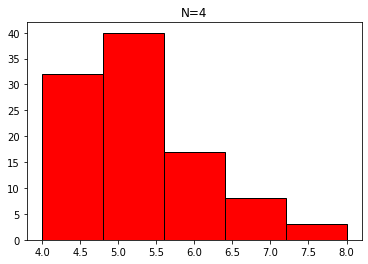

Mean =  5.1


In [61]:
import matplotlib.pyplot as plt

plt.title('N=4')
plt.hist(iterator, bins =5,color='red',edgecolor='black')
#plt.grid(True)
plt.show()
print("Mean = ",mean/100)

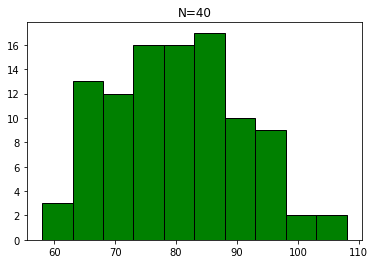

Mean =  79.88


In [69]:
import matplotlib.pyplot as plt

plt.title('N=40')
plt.hist(iterator2 ,bins =10,color='green',edgecolor='black')
#plt.grid(True)
plt.show()
print("Mean = ",mean2/100)